# Nashville Housing Project
---
By Aaron Joslin-Wangdu on 9/17/2021


## Goal
---
The goal for this project was to investigate the differences in the following data from 2013 to 2016:
1. How many sales there were in each city in the Nashville area?
2. How do the number of sales differ by year?
3. What is the average sale price for each city?
4. How are the sale prices distributed for each city?


## The Data
---
The dataset used in this project is the publicly available [Nashville Housing Dataset](https://www.kaggle.com/tmthyjames/nashville-housing-data) that includes data about property sales in the greater Nashville, Tennessee area. The raw data as well as the cleaned data are located in the [data folder](https://github.com/aaronjoslinwangdu/nashville-housing-project/tree/main/data).


## Preparation
---
The raw dataset was imported into a local database using Microsoft SQL Server Management and all of the cleaning was done there. Supplementary notes and the functions used to clean the data can be located in the [Data_Cleaning_Portfolio_Project_Queries.sql file](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/Data_Cleaning_Portfolio_Project_Queries.sql). The resulting data was then exported to a [.csv file](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Clean.csv).

This file was then imported into Google Sheets and some irrelevant/inaccurate data was removed. The resulting file can be viewed [here](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Clean_v2.csv), and contains the data we will use to conduct the rest of the analysis in this project.


## Analysis
---
We will analyze this data using Python. The packages that were used are: pandas.

First, import all of the necessary packages

In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

Next, create a dataframe by reading the values in the [.csv](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Cleaned.csv) file.

In [4]:
df = pd.read_csv('Nashville_Housing_Data_Clean_v2.csv')

#convert SaleDateConverted column to a date format
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'])

#show table info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56367 entries, 0 to 56366
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UniqueID              56365 non-null  float64       
 1   ParcelID              56365 non-null  object        
 2   LandUse               56365 non-null  object        
 3   SalePrice             56365 non-null  float64       
 4   LegalReference        56365 non-null  object        
 5   SoldAsVacant          56365 non-null  object        
 6   Acreage               25964 non-null  float64       
 7   LandValue             25964 non-null  float64       
 8   BuildingValue         25964 non-null  float64       
 9   TotalValue            25964 non-null  float64       
 10  YearBuilt             24116 non-null  float64       
 11  Bedrooms              24110 non-null  float64       
 12  FullBath              24228 non-null  float64       
 13  HalfBath        

---
See what the first ten rows of the dataframe look like.

In [5]:
testView = df.head(10)
testView

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,...,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState,SaleYear
0,56063.0,026 07 0 184.00,SINGLE FAMILY,205000.0,20161101-0115368,No,0.23,26000.0,111100.0,137100.0,...,3.0,2.0,0.0,2016-10-31,103 TUDOR CT,GOODLETTSVILLE,103 TUDOR CT,GOODLETTSVILLE,TN,2016.0
1,56041.0,033 03 0B 105.00,SINGLE FAMILY,217900.0,20161102-0115681,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-10-31,132 IVY HILL LN,GOODLETTSVILLE,NaN,NaN,NaN,2016.0
2,56270.0,083 15 0 042.00,SINGLE FAMILY,245765.0,20161102-0115610,No,0.32,35000.0,116700.0,167300.0,...,2.0,1.0,0.0,2016-10-31,2805 FORTLAND DR,NASHVILLE,2805 FORTLAND DR,NASHVILLE,TN,2016.0
3,56126.0,052 09 0 027.00,SINGLE FAMILY,390000.0,20161103-0116430,No,0.39,54000.0,90300.0,153200.0,...,3.0,3.0,0.0,2016-10-31,1017 AFALLS AVE,MADISON,1017 A FALLS AVE,MADISON,TN,2016.0
4,56127.0,052 09 0 028.00,SINGLE FAMILY,390000.0,20161103-0116430,No,0.40,54000.0,42800.0,96800.0,...,2.0,1.0,0.0,2016-10-31,1017 BFALLS AVE,MADISON,1017 B FALLS AVE,MADISON,TN,2016.0
5,56296.0,052 13 0B 218.00,SINGLE FAMILY,146200.0,20161104-0116791,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-10-31,2549 SONAR ST,NASHVILLE,NaN,NaN,NaN,2016.0
6,56056.0,050 16 0A 013.00,SINGLE FAMILY,160000.0,20161107-0117668,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-10-31,409 VAILVIEW DR,NASHVILLE,NaN,NaN,NaN,2016.0
7,56103.0,051 07 0 089.00,SINGLE FAMILY,199900.0,20161107-0117569,No,1.04,35000.0,109900.0,144900.0,...,3.0,1.0,1.0,2016-10-31,205 FREDA VILLA,MADISON,205 FREDA VILLA,MADISON,TN,2016.0
8,56109.0,051 15 0A 053.00,RESIDENTIAL CONDO,58000.0,20161109-0118793,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-10-31,420 WALTON LN,MADISON,NaN,NaN,NaN,2016.0
9,55425.0,161 13 0B 411.00,RESIDENTIAL CONDO,311750.0,20161103-0116566,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-10-31,411 LAZY CREEK LN,NASHVILLE,NaN,NaN,NaN,2016.0


From the previous two cells we can see that many rows are missing data in columns including **Acreage**, **LandValue**, and **FullBath**. However, these columns won't be used in our analysis and the key columns for this project: **SalePrice**, **PropertySplitCity**, and **Year** are fully populated.


First, count how many sales there were in each city during each year.

In [6]:
df_grouped1 = df.groupby(['SaleYear', 'PropertySplitCity']).size().reset_index()
table1 = pd.pivot_table(df_grouped1, index=['SaleYear'], columns=['PropertySplitCity'])

#rather than have NaN's, fill with zeros since these NaN's represent when there were zero sales in that city
table1 = table1.fillna(0)

#since there is no such thing as a half sale, convert all values to integers
table1 = table1.astype(int)

table1

0                                                      \
PropertySplitCity ANTIOCH BELLEVUE BRENTWOOD GOODLETTSVILLE HERMITAGE JOELTON   
SaleYear                                                                        
2013.0               1257        0       357            119       652       3   
2014.0               1407        1       440            166       838       1   
2015.0               2002        0       547            275       876       3   
2016.0               1618        0       352            175       759       4   

                                                                          \
PropertySplitCity MADISON MOUNT JULIET NASHVILLE NOLENSVILLE OLD HICKORY   
SaleYear                                                                   
2013.0                334           29      8198          56         262   
2014.0                441           44     10487         121         306   
2015.0                582           88     11748         154         430   
2016.0                757           19      9782         163         415   

                                
PropertySplitCity WHITES CREEK  
SaleYear                        
2013.0                      24  
2014.0                      22  
2015.0                      27  
2016.0                      24

Check the percentage in which sales grew/declined in each city per year.

In [7]:
table1_pct = table1.pct_change()

#change NaN's to zeros
table1_pct = table1_pct.fillna(0)

table1_pct

0                                              \
PropertySplitCity   ANTIOCH BELLEVUE BRENTWOOD GOODLETTSVILLE HERMITAGE   
SaleYear                                                                  
2013.0             0.000000      0.0  0.000000       0.000000  0.000000   
2014.0             0.119332      inf  0.232493       0.394958  0.285276   
2015.0             0.422886     -1.0  0.243182       0.656627  0.045346   
2016.0            -0.191808      0.0 -0.356490      -0.363636 -0.133562   

                                                                          \
PropertySplitCity   JOELTON   MADISON MOUNT JULIET NASHVILLE NOLENSVILLE   
SaleYear                                                                   
2013.0             0.000000  0.000000     0.000000  0.000000    0.000000   
2014.0            -0.666667  0.320359     0.517241  0.279214    1.160714   
2015.0             2.000000  0.319728     1.000000  0.120244    0.272727   
2016.0             0.333333  0.300687    -0.784091 -0.167348    0.058442   

                                            
PropertySplitCity OLD HICKORY WHITES CREEK  
SaleYear                                    
2013.0               0.000000     0.000000  
2014.0               0.167939    -0.083333  
2015.0               0.405229     0.227273  
2016.0              -0.034884    -0.111111

Now compute the percentage growth or decline of total sales in the Nashville area per year.

In [8]:
df.groupby(['SaleYear']).size().pct_change().fillna(0)

SaleYear
2013.0    0.000000
2014.0    0.264193
2015.0    0.172201
2016.0   -0.159216
dtype: float64

Next, calculate the average sale price in each city per year.

In [9]:
df.groupby(['SaleYear','PropertySplitCity']).SalePrice.mean()

SaleYear  PropertySplitCity
2013.0    ANTIOCH              216937.496420
          BRENTWOOD            292749.619048
          GOODLETTSVILLE       152123.882353
          HERMITAGE            170877.806748
          JOELTON              122800.000000
          MADISON              111732.901198
          MOUNT JULIET         221658.896552
          NASHVILLE            261786.504879
          NOLENSVILLE          267498.017857
          OLD HICKORY          175230.480916
          WHITES CREEK         157106.250000
2014.0    ANTIOCH              276101.176972
          BELLEVUE              25000.000000
          BRENTWOOD            293942.502273
          GOODLETTSVILLE       151626.265060
          HERMITAGE            216114.688544
          JOELTON              125000.000000
          MADISON              152976.154195
          MOUNT JULIET         214212.568182
          NASHVILLE            370105.498236
          NOLENSVILLE          294017.851240
          OLD HICKORY      

Now check how many sales there are for each land type per year.

In [10]:
df_grouped2 = df.groupby(['SaleYear', 'LandUse']).size().reset_index()
table2 = pd.pivot_table(df_grouped2, index=['SaleYear'], columns=['LandUse'])

#rather than have NaN's, fill with zeros since these NaN's represent when there were zero sales of that type of property
table2 = table2.fillna(0)

#since there is no such thing as a half sale, convert all values to integers
table2 = table2.astype(int)

table2

0                               \
LandUse  APARTMENT: LOW RISE (BUILT SINCE 1960) CHURCH CLUB/UNION HALL/LODGE   
SaleYear                                                                       
2013.0                                        0      4                     0   
2014.0                                        0     15                     1   
2015.0                                        2      5                     0   
2016.0                                        0      9                     0   

                                                    \
LandUse  CONDO CONDOMINIUM OFC  OR OTHER COM CONDO   
SaleYear                                             
2013.0     109                                   4   
2014.0     138                                   6   
2015.0       0                                  22   
2016.0       0                                   3   

                                                         \
LandUse  CONVENIENCE MARKET WITHOUT GAS DAY CARE CENTER   
SaleYear                                                  
2013.0                                0               0   
2014.0                                1               0   
2015.0                                0               1   
2016.0                                0               1   

                                                 ...                        \
LandUse  DORMITORY/BOARDING HOUSE DUPLEX FOREST  ... STRIP SHOPPING CENTER   
SaleYear                                         ...                         
2013.0                          7    322      0  ...                     1   
2014.0                          3    327      1  ...                     0   
2015.0                          3    393      3  ...                     0   
2016.0                          6    330      6  ...                     0   

                                                                         \
LandUse  TERMINAL/DISTRIBUTION WAREHOUSE TRIPLEX VACANT COMMERCIAL LAND   
SaleYear                                                                  
2013.0                                 0      26                      6   
2014.0                                 0      30                      8   
2015.0                                 2      17                      2   
2016.0                                 0      19                      1   

                                                                         \
LandUse  VACANT RES LAND VACANT RESIDENTIAL LAND VACANT RESIENTIAL LAND   
SaleYear                                                                  
2013.0              1145                       0                      0   
2014.0               404                     788                      0   
2015.0                 0                    1658                      3   
2016.0                 0                    1094                      0   

                                                                    
LandUse  VACANT RURAL LAND VACANT ZONED MULTI FAMILY ZERO LOT LINE  
SaleYear                                                            
2013.0                   1                         2           193  
2014.0                   0                         0           262  
2015.0                   0                         0           301  
2016.0                   1                         0           291  

[4 rows x 37 columns]

## Visualizations
---
All of the visualizations from the following section are available to download/view [here](https://github.com/aaronjoslinwangdu/nashville-housing-project/tree/main/visualizations).


Code and visuals for a figure with bar charts representing the total sales by city from 2013 to 2016.

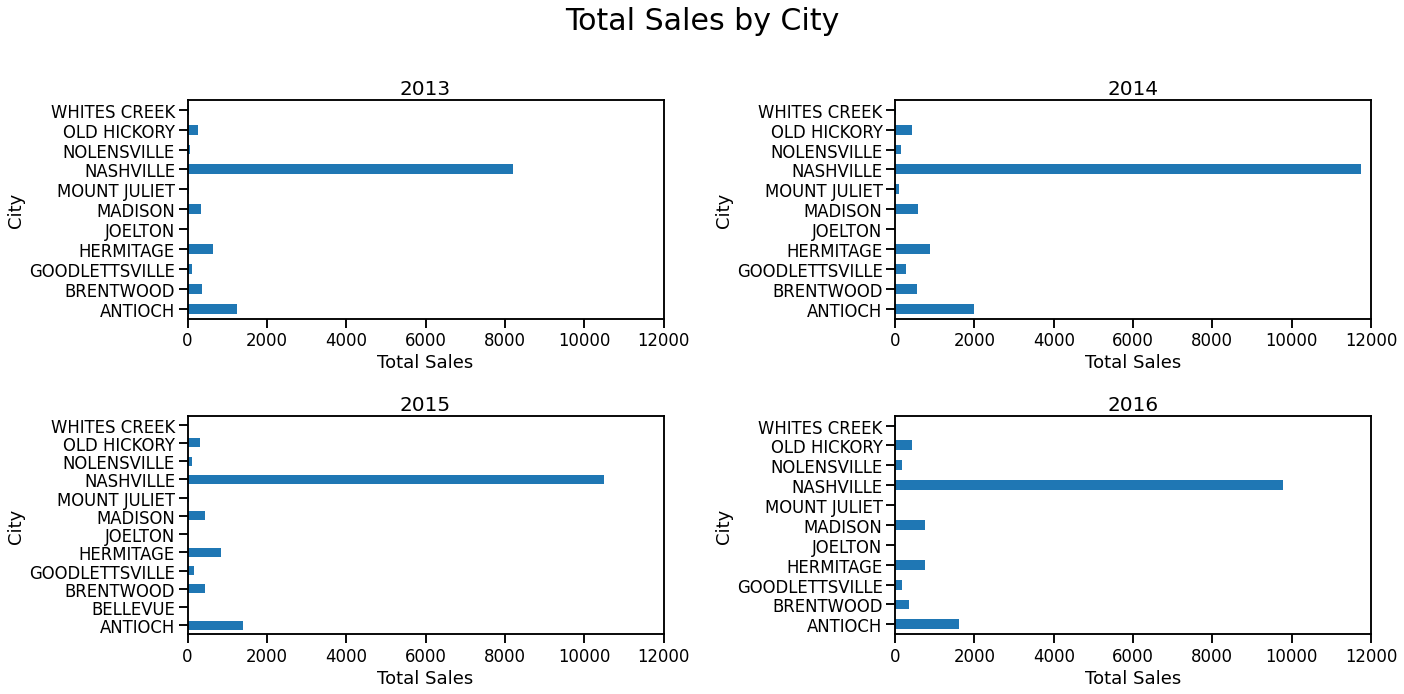

In [81]:
#create a grouped dataframe to use to make the charts
df_grouped = df.groupby(['SaleYear', 'PropertySplitCity']).size().to_frame('NumSales').reset_index()

#begin yearly sales bar charts
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Total Sales by City', fontsize=30)

df_grouped_year = df_grouped.loc[df_grouped['SaleYear'] == 2013]
city_list = df_grouped_year['PropertySplitCity'].tolist()
sales_list = df_grouped_year['NumSales'].tolist()
ax1 = df_grouped_year.plot.barh(x='PropertySplitCity',y='NumSales',ax=axes[0,0])
ax1.set_xlim([0,12000])
ax1.set_xlabel('Total Sales')
ax1.set_ylabel('City')
ax1.get_legend().remove()

df_grouped_year = df_grouped.loc[df_grouped['SaleYear'] == 2014]
city_list = df_grouped_year['PropertySplitCity'].tolist()
sales_list = df_grouped_year['NumSales'].tolist()
ax2 = df_grouped_year.plot.barh(x='PropertySplitCity',y='NumSales',ax=axes[1,0])
ax2.set_xlim([0,12000])
ax2.set_xlabel('Total Sales')
ax2.set_ylabel('City')
ax2.get_legend().remove()

df_grouped_year = df_grouped.loc[df_grouped['SaleYear'] == 2015]
city_list = df_grouped_year['PropertySplitCity'].tolist()
sales_list = df_grouped_year['NumSales'].tolist()
ax3 = df_grouped_year.plot.barh(x='PropertySplitCity',y='NumSales',ax=axes[0,1])
ax3.set_xlim([0,12000])
ax3.set_xlabel('Total Sales')
ax3.set_ylabel('City')
ax3.get_legend().remove()

df_grouped_year = df_grouped.loc[df_grouped['SaleYear'] == 2016]
city_list = df_grouped_year['PropertySplitCity'].tolist()
sales_list = df_grouped_year['NumSales'].tolist()
ax4 = df_grouped_year.plot.barh(x='PropertySplitCity',y='NumSales',ax=axes[1,1])
ax4.set_xlim([0,12000])
ax4.set_xlabel('Total Sales')
ax4.set_ylabel('City')
ax4.get_legend().remove()

axes[0,0].set_title('2013',fontsize='20')
axes[0,1].set_title('2014',fontsize='20')
axes[1,0].set_title('2015',fontsize='20')
axes[1,1].set_title('2016',fontsize='20')


fig.tight_layout(pad=2.5)
fig.subplots_adjust(top=0.85)

#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\sales_by_city.png')

---

Key observations about these graphs include:
1. Nashville has the highest total number of sales out of any city by far, but this is to be expected.
2. Most cities experiences their highest number of total sales in 2014.
3. After 2014 total sales per year decreased in nearly all cities.

---

Now, let's try to represent monthly sales in each city using a heatmap.

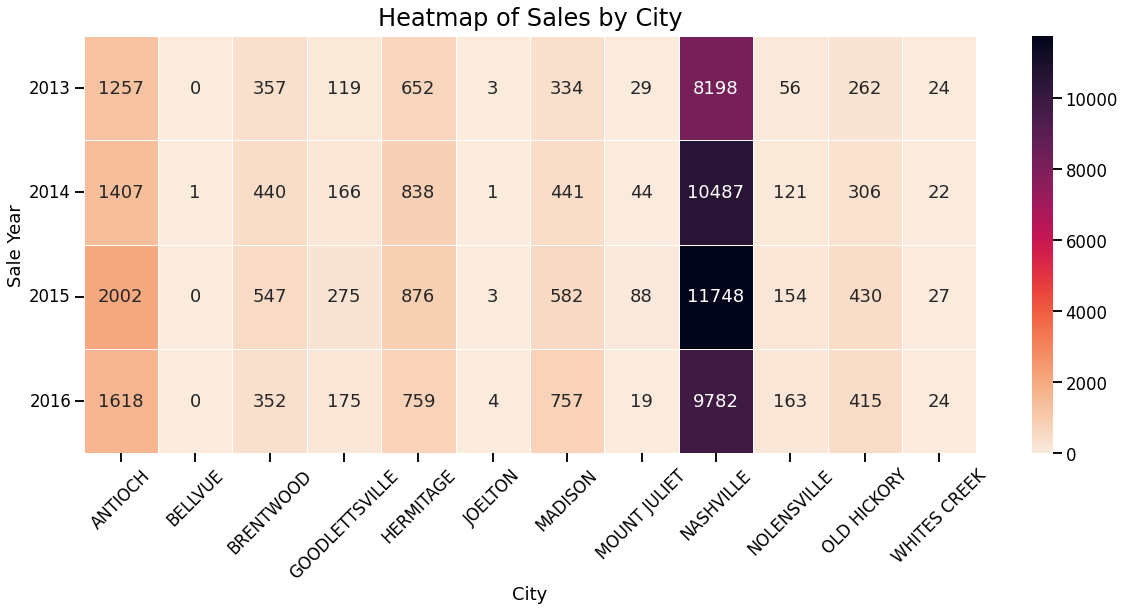

In [91]:
#now get the number of sales per month by city
spm = df.groupby(['PropertySplitCity','SaleYear']).size().to_frame('NumSales').reset_index()

cities = df['PropertySplitCity'].unique().tolist()


#create pivot table with info that we want
spm2 = pd.pivot_table(spm,index=['SaleYear'],columns=['PropertySplitCity'],values=['NumSales'])

#rather than have NaN's, fill with zeros 
spm2 = spm2.fillna(0)

#since there is no such thing as a half sale, convert all values to integers
spm2 = spm2.astype(int)

sns.set_context("talk")
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(spm2, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=sns.color_palette("rocket_r", as_cmap=True),yticklabels=['2013','2014','2015','2016'],xticklabels=['ANTIOCH','BELLVUE','BRENTWOOD','GOODLETTSVILLE','HERMITAGE','JOELTON','MADISON','MOUNT JULIET','NASHVILLE','NOLENSVILLE','OLD HICKORY','WHITES CREEK'])
ax.axes.set_title("Heatmap of Sales by City", fontsize=24, y=1.01)
ax.set(xlabel='City', ylabel='Sale Year');
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)

plt.gcf().subplots_adjust(bottom=0.30)
#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\sales_by_city_hm.png')

Remove Nashville and see how it looks.

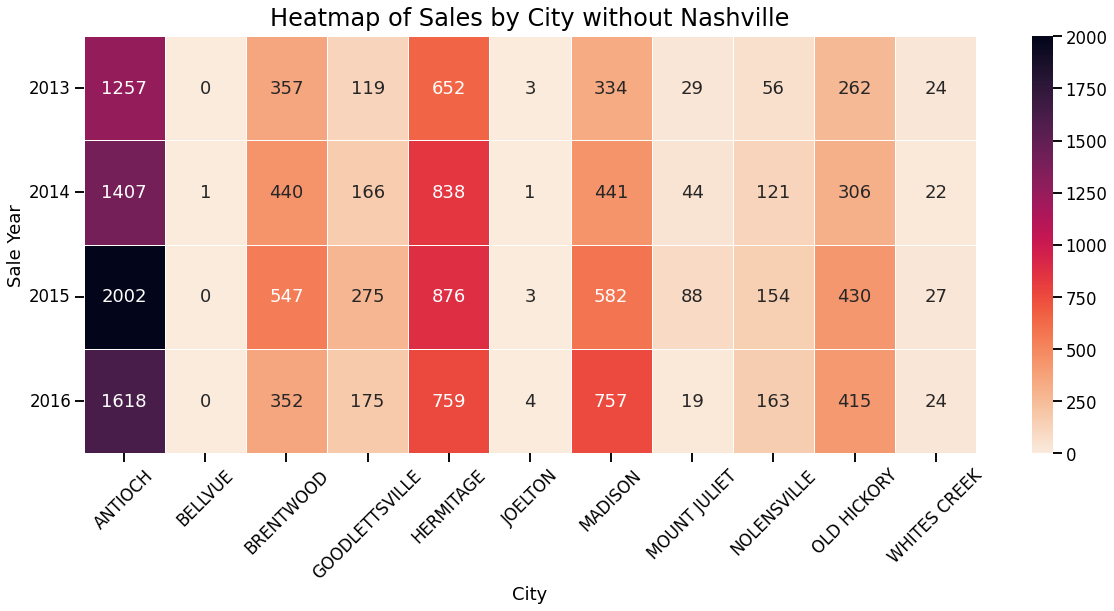

In [92]:
#drop nashville column, lets see what the heatmap looks like now
spm2.drop(spm2.columns[[8]],axis=1,inplace=True)

sns.set_context("talk")
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(spm2, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=sns.color_palette("rocket_r", as_cmap=True),yticklabels=['2013','2014','2015','2016'],xticklabels=['ANTIOCH','BELLVUE','BRENTWOOD','GOODLETTSVILLE','HERMITAGE','JOELTON','MADISON','MOUNT JULIET','NOLENSVILLE','OLD HICKORY','WHITES CREEK'])
ax.axes.set_title("Heatmap of Sales by City without Nashville", fontsize=24, y=1.01)
ax.set(xlabel='City', ylabel='Sale Year');
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)

plt.gcf().subplots_adjust(bottom=0.30)
#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\sales_by_city_hm_v2.png')

---

Observations about these graphs include:
1. Madison, Nolensville, and Joelton (very small) were the only cities that experienced an increased number of total sales from 2015 to 2016.
2. All cities experienced growth in sale numbers from 2013 to 2014, and 2014 to 2015.

---

Code and visuals for graphs representing the average sale price in each city by year.

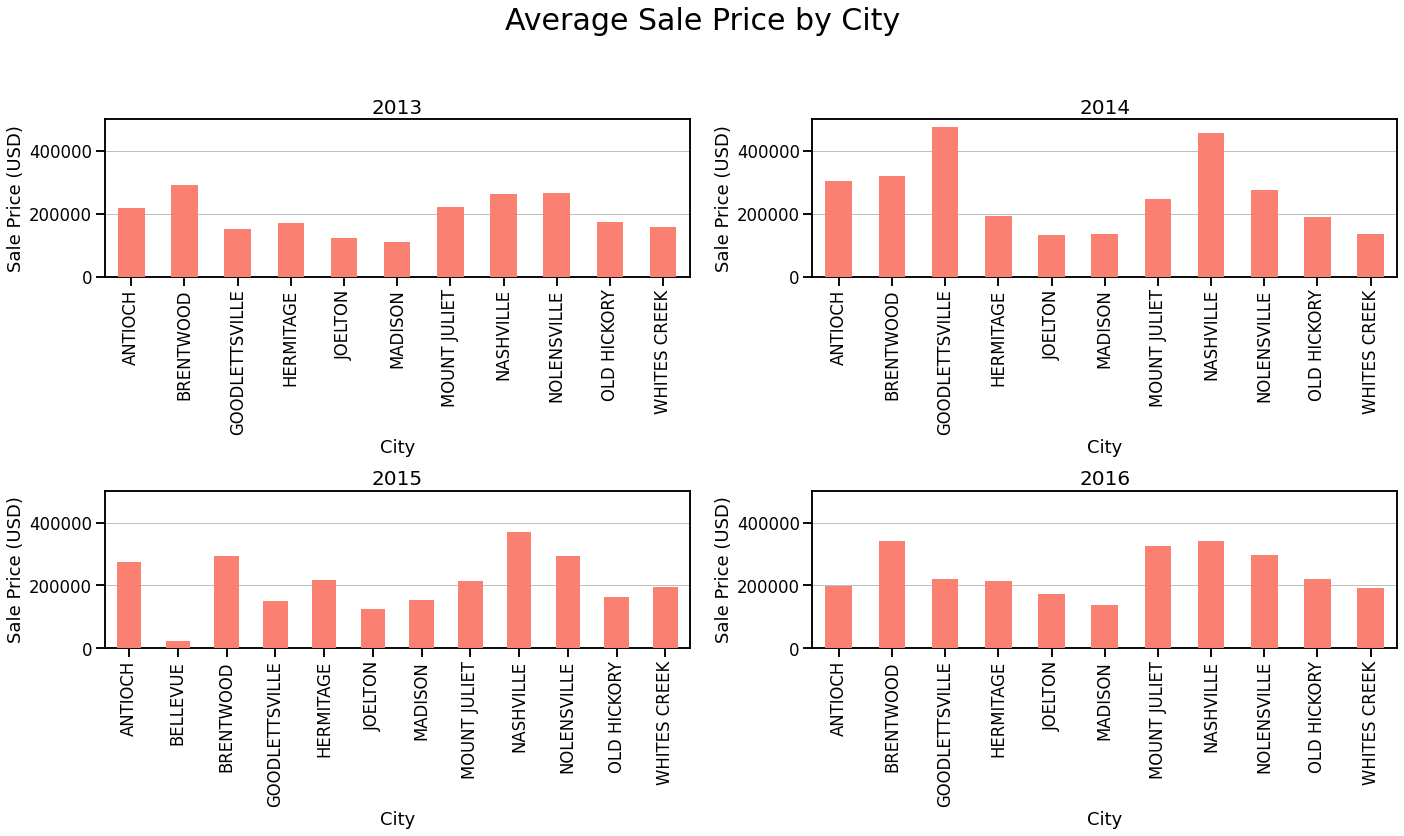

In [94]:
df_mean = df.groupby(['SaleYear', 'PropertySplitCity']).mean().reset_index()

#start average sale price for each city graph

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Average Sale Price by City', fontsize=30)

df_mean_year = df_mean.loc[df_mean['SaleYear'] == 2013]
city_list = df_mean_year['PropertySplitCity'].tolist()
mean_list = df_mean_year['SalePrice'].tolist()
ax1 = df_mean_year.plot.bar(x='PropertySplitCity',y='SalePrice',ax=axes[0,0],zorder=3,color=['#FA8072'])
ax1.set_ylim([0,500000])
ax1.grid(True, color = "grey", linewidth = "0.5", linestyle = "-",zorder=0,axis='y')
ax1.get_legend().remove()
ax1.set_ylabel('Sale Price (USD)')
ax1.set_xlabel('City')

df_mean_year = df_mean.loc[df_mean['SaleYear'] == 2014]
city_list = df_mean_year['PropertySplitCity'].tolist()
mean_list = df_mean_year['SalePrice'].tolist()
ax2 = df_mean_year.plot.bar(x='PropertySplitCity',y='SalePrice',ax=axes[1,0],zorder=3,color=['#FA8072'])
ax2.set_ylim([0,500000])
ax2.grid(True, color = "grey", linewidth = "0.5", linestyle = "-",zorder=0,axis='y')
ax2.get_legend().remove()
ax2.set_ylabel('Sale Price (USD)')
ax2.set_xlabel('City')

df_mean_year = df_mean.loc[df_mean['SaleYear'] == 2015]
city_list = df_mean_year['PropertySplitCity'].tolist()
mean_list = df_mean_year['SalePrice'].tolist()
ax3 = df_mean_year.plot.bar(x='PropertySplitCity',y='SalePrice',ax=axes[0,1],zorder=3,color=['#FA8072'])
ax3.set_ylim([0,500000])
ax3.grid(True, color = "grey", linewidth = "0.5", linestyle = "-",zorder=0,axis='y')
ax3.get_legend().remove()
ax3.set_ylabel('Sale Price (USD)')
ax3.set_xlabel('City')

df_mean_year = df_mean.loc[df_mean['SaleYear'] == 2016]
city_list = df_mean_year['PropertySplitCity'].tolist()
mean_list = df_mean_year['SalePrice'].tolist()
ax4 = df_mean_year.plot.bar(x='PropertySplitCity',y='SalePrice',ax=axes[1,1],zorder=3,color=['#FA8072'])
ax4.set_ylim([0,500000])
ax4.grid(True, color = "grey", linewidth = "0.5", linestyle = "-",zorder=0,axis='y')
ax4.get_legend().remove()
ax4.set_ylabel('Sale Price (USD)')
ax4.set_xlabel('City')

axes[0,0].set_title('2013',fontsize='20')
axes[0,1].set_title('2014',fontsize='20')
axes[1,0].set_title('2015',fontsize='20')
axes[1,1].set_title('2016',fontsize='20')


fig.tight_layout(pad=2.5)
fig.subplots_adjust(top=0.85)

#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\avg_price_by_city.png')

---

Key observations about this graph include:
1. The average sale price spiked in 2014 in cities where the average sale prices were historically higher.
2. Goodlettsville experienced a massive increase in average sale price in 2014.
3. The change in average sale price from 2013 to 2016 was less significant in cities with higher average sale prices, i.e. Nashville and Brentwood.

---

Next, we will visualize the frequency of different sale prices by city using histograms. 

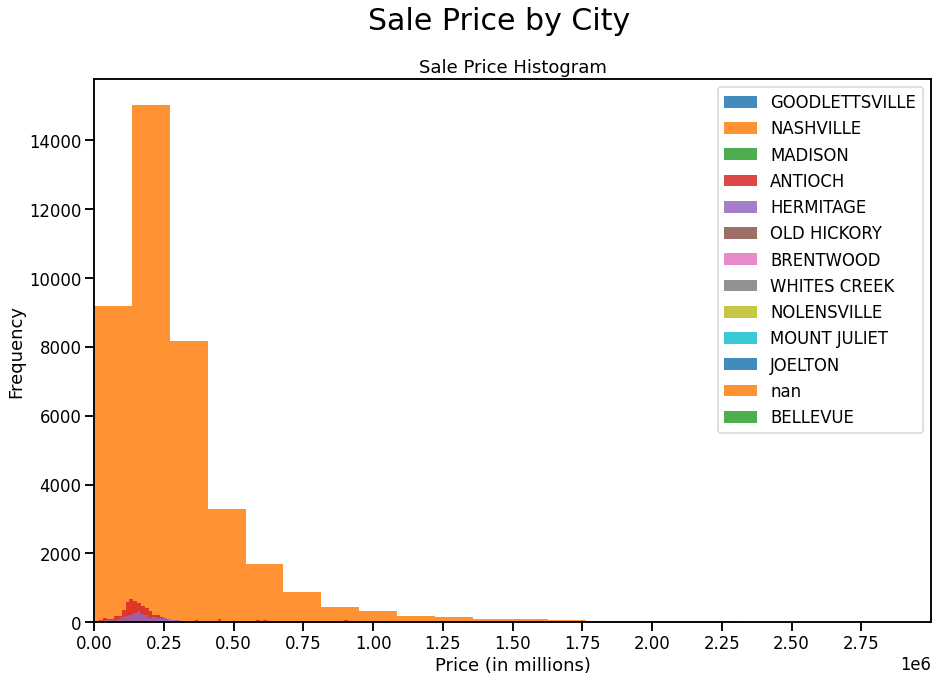

In [24]:
#start sale price histogram
cities = df['PropertySplitCity'].unique().tolist()

fig, axes = plt.subplots(figsize=(15, 10))
fig.suptitle('Sale Price by City', fontsize=30)
i=0

for city in cities:
    newdf = df.loc[(df['PropertySplitCity'] == city)]
    plt.hist(newdf['SalePrice'], bins=400, alpha = 0.85)
    plt.legend(cities)
    plt.xlim([0, 3000000])
    plt.xticks(np.arange(0, 3000000, 250000))
    plt.xlabel('Price (in millions)')
    plt.ylabel('Frequency')
    plt.title('Sale Price Histogram')

#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\sale_price_hist.png')

---

Key observations about this graph include:
1. The number of sale prices for Nashville rises, peaks at ~200,000 USD, then tapers off significantly.
2. Since Nashville had so many more sales than other cities it makes it too hard to see all of the other data.
3. We should remove Nashville to take a closer look at the rest of the data.

---

Let's take Nashville out of the dataset and look at the remaining data.

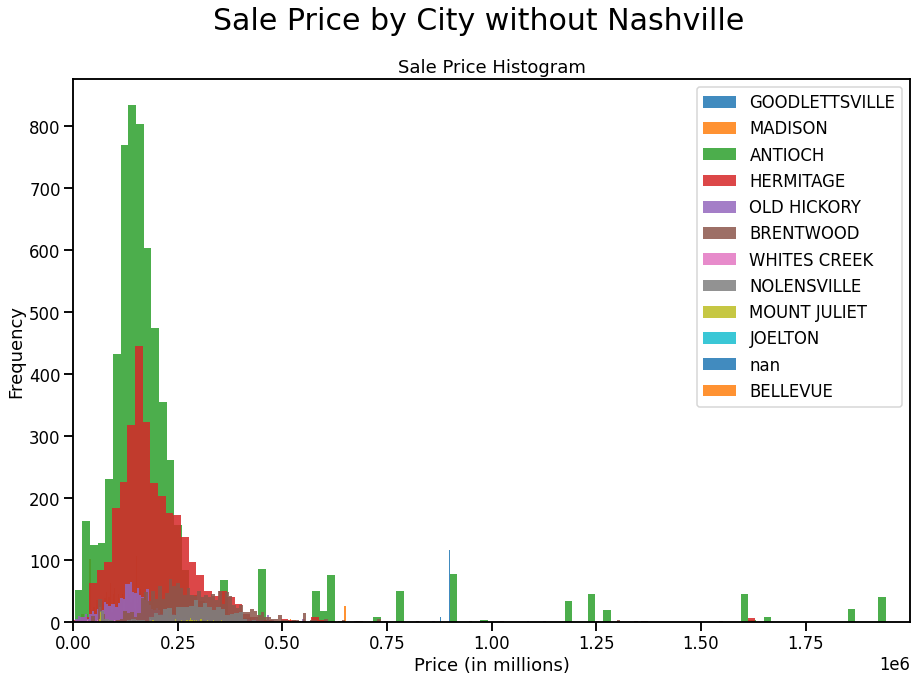

In [397]:
nonv = [x for x in cities if x != 'NASHVILLE']

fig, axes = plt.subplots(figsize=(15, 10))
fig.suptitle('Sale Price by City without Nashville', fontsize=30)

for city in nonv:
    newdf = df.loc[(df['PropertySplitCity'] == city)]
    plt.hist(newdf['SalePrice'], bins=300, alpha = 0.85)
    plt.legend(nonv)
    plt.xlim([0, 2000000])
    plt.xticks(np.arange(0, 2000000, 250000))
    plt.xlabel('Price (in millions)')
    plt.ylabel('Frequency')
    plt.title('Sale Price Histogram')

#save the figure
#plt.savefig(r'path\nashville-housing-project\visualizations\sale_price_hist_v2.png')

---

Key observations about this graph include:
1. The number of sale prices for Antioch and Hermitage rise, peak at ~140,000 USD, then tapers off before 500,000 USD.
2. Antioch and Hermitage have a lower average sale price than most other cities.
3. Again, the two cities with the highest number of sales are making it hard to see the rest of the data.

---

Remove Antioch and Hermitage as well and see what it looks like.

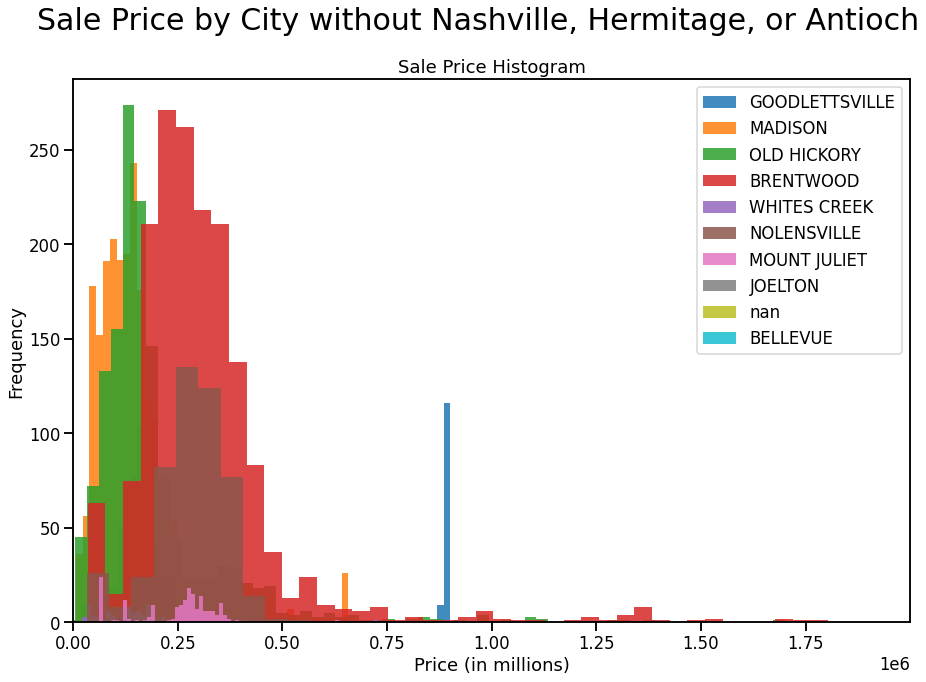

In [398]:
noah = [x for x in nonv if x != 'HERMITAGE']
noah.remove('ANTIOCH')

fig, axes = plt.subplots(figsize=(15, 10))
fig.suptitle('Sale Price by City without Nashville, Hermitage, or Antioch', fontsize=30)

for city in noah:
    newdf = df.loc[(df['PropertySplitCity'] == city)]
    plt.hist(newdf['SalePrice'], bins=60, alpha = 0.85)
    plt.legend(noah)
    plt.xlim([0, 2000000])
    plt.xticks(np.arange(0, 2000000, 250000))
    plt.xlabel('Price (in millions)')
    plt.ylabel('Frequency')
    plt.title('Sale Price Histogram')

#save the figure 
#plt.savefig(r'path\nashville-housing-project\visualizations\sale_price_hist_v3.png')

---

Key observations about this graph include:
1. In the cities with much less frequent sales, the average price is comparable to the cities with much more frequent sales.
2. Goodlettsville had a small number of very expensive sales.

## Difficulties
---


Here are some of the difficulties experienced during the timeline of this project:
1. Since more than 75% of the sales were located in Nashville, it made the other data seem less significant.
2. Some cities only had one or two sales, which made it difficult to include/analyze it.
3. Graphing all of the data on to single histograms made them turn out too cluttered and confusing. A better option would be graphing them individually, however then there would be a surplus of graphs for that section which is not desireable.

## Conclusion
---


The most important takeaways from this project are as follows:
1. The Nashville, Tennessee area experienced a 26% increase in property sales from 2013 to 2014.
2. The total number of sales continued to increase in from 2014 to 2015, then became lower in 2016.
3. Antioch and Hermitage, the cities with the second and third highest number of total sales, had a higher proportion of lower priced properties being sold than other cities.
4. The change in average sale price from 2013 to 2016 was less significant in cities with higher average sale prices, while cities with lower average sale prices saw a higher increases in average sale price.

The next steps regarding this project will be:
1. Potentially do another study with more recent data from the Nashville area and see what has changed since 2016.
2. Improve the visualization method for the histograms.
3. Keep praciticing with matplotlib, I hadn't used this package in a while and was quite rusty.